In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pkl

from google.colab import drive
user_name = '/content/drive'
drive.mount(user_name, force_remount=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Rewards

In [0]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

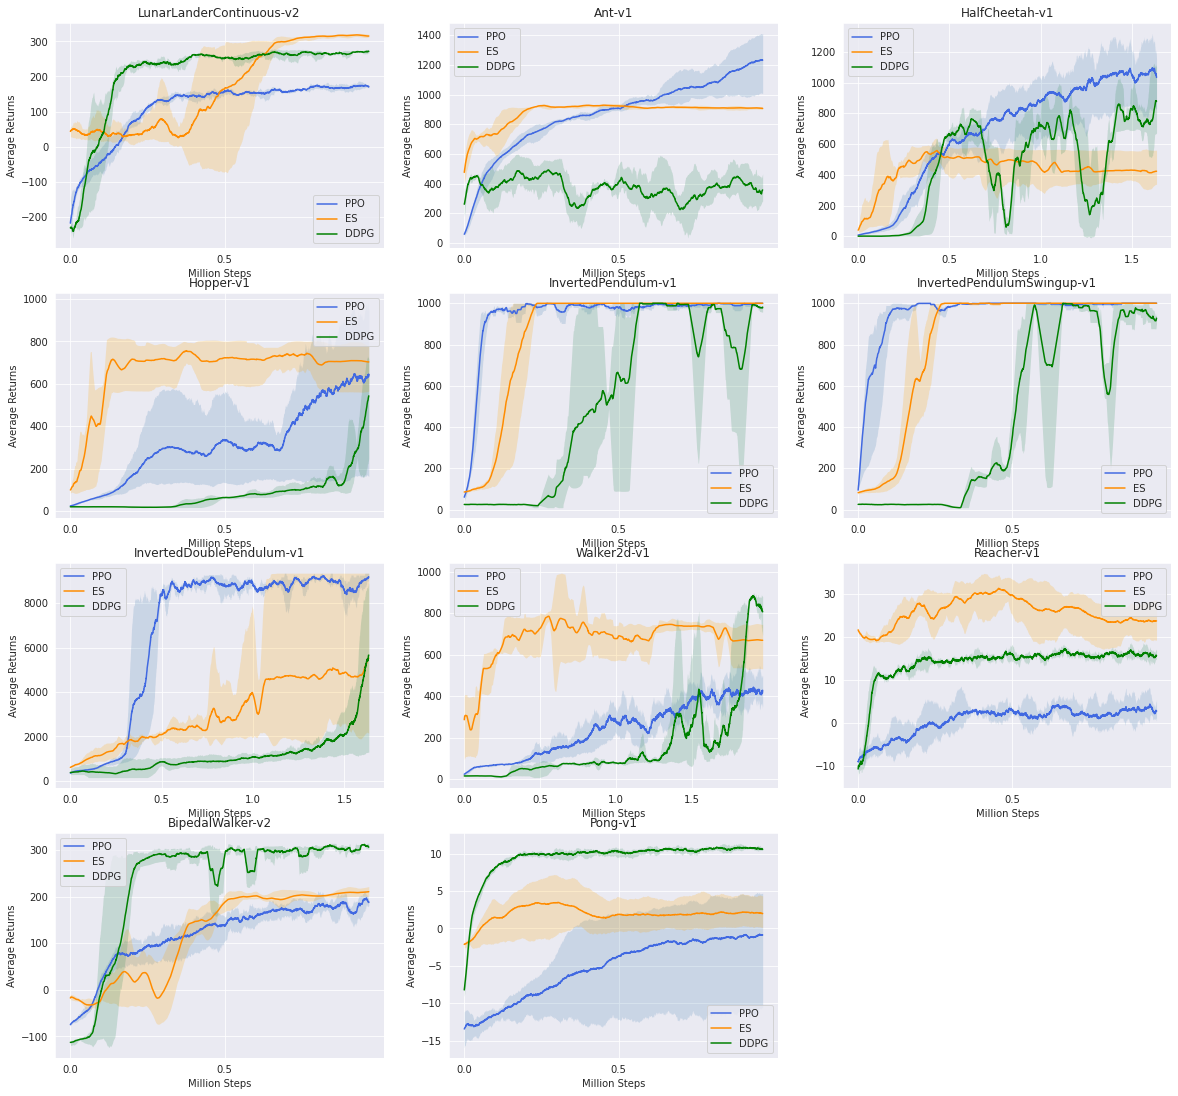

In [0]:

es_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/ES/'
ppo_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/PPO/'
td3_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/TD3/'
ppe_name = '/content/drive/My Drive/Colab Notebooks/Checkpoint/PPE/'

env_list = ['LunarLanderContinuous-v2','Ant-v1','HalfCheetah-v1','Hopper-v1','InvertedPendulum-v1',
            'InvertedPendulumSwingup-v1','InvertedDoublePendulum-v1','Walker2d-v1','Reacher-v1','BipedalWalker-v2','Pong-v1']

sns.set_style('dark', {'axes.grid' : True})
alpha = 0.2
avg = 100
plt.figure(figsize=(20,24))
num_plots = 2*len(env_list)

count = 0
for env_name in env_list:
    count += 1
    if env_name in ['HalfCheetah-v1']:
      x = 5000
    elif env_name in ['Walker2d-v1']:
      x = 6000
    elif env_name in ['InvertedDoublePendulum-v1']:
      x = 5000
    else:
      x = 3000
    data_ppo_1 = moving_average(pkl.load(open(ppo_name+env_name+'/v1'+'/data.pkl','rb'))['avg_reward'][:x],avg)
    data_ppo_2 = moving_average(pkl.load(open(ppo_name+env_name+'/v2'+'/data.pkl','rb'))['avg_reward'][:x],avg)
    data_ppo_3 = moving_average(pkl.load(open(ppo_name+env_name+'/v3'+'/data.pkl','rb'))['avg_reward'][:x],avg)
    data_es_1 = moving_average(pkl.load(open(es_name+env_name+'/v1'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_es_2 = moving_average(pkl.load(open(es_name+env_name+'/v2'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_es_3 = moving_average(pkl.load(open(es_name+env_name+'/v3'+'/data.pkl','rb'))['max_rewards'][:x],avg)
    data_td3_1 = moving_average(np.load(td3_name+env_name+'/v1'+'/data.npy')[-x:],avg)
    data_td3_2 = moving_average(np.load(td3_name+env_name+'/v2'+'/data.npy')[-x:],avg)
    data_td3_3 = moving_average(np.load(td3_name+env_name+'/v3'+'/data.npy')[-x:],avg)

    max_ppo = [];min_ppo = [];avg_ppo = []
    max_es = [];min_es = [];avg_es = []
    max_td3 = [];min_td3 = [];avg_td3 = []
    
    for i in range(len(data_ppo_1)):
      max_ppo.append(max(data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]))
      min_ppo.append(min(data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]))
      avg_ppo.append(np.mean([data_ppo_1[i],data_ppo_2[i],data_ppo_3[i]]))
      max_es.append(max(data_es_1[i],data_es_2[i],data_es_3[i]))
      min_es.append(min(data_es_1[i],data_es_2[i],data_es_3[i]))
      avg_es.append(np.mean([data_es_1[i],data_es_2[i],data_es_3[i]]))
      max_td3.append(max(data_td3_1[i],data_td3_2[i],data_td3_3[i]))
      min_td3.append(min(data_td3_1[i],data_td3_2[i],data_td3_3[i]))
      avg_td3.append(np.mean([data_td3_1[i],data_td3_2[i],data_td3_3[i]]))
    
    plt.subplot(5,3,count)
    plt.title(env_name)
    plt.plot(np.arange(0,len(avg_ppo),1),avg_ppo, color='royalblue')
    plt.fill_between(np.arange(0,len(avg_ppo),1),min_ppo,max_ppo,facecolor='steelblue', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_es),1),avg_es, color='darkorange')
    plt.fill_between(np.arange(0,len(avg_es),1),min_es,max_es,facecolor='orange', alpha=alpha, linewidth=0, antialiased=True)
    plt.plot(np.arange(0,len(avg_td3),1),avg_td3, color='green')
    plt.fill_between(np.arange(0,len(avg_td3),1),min_td3,max_td3,facecolor='seagreen', alpha=alpha, linewidth=0, antialiased=True)
    plt.xticks(np.arange(0,x,1500),np.arange(0,(x/3000),0.5))
    plt.xlabel('Million Steps')
    plt.ylabel('Average Returns')
    plt.legend(['PPO','ES','DDPG'])




In [0]:
len(data_es_2)

2951

### PPE

Text(0.5, 0, 'Million Steps')

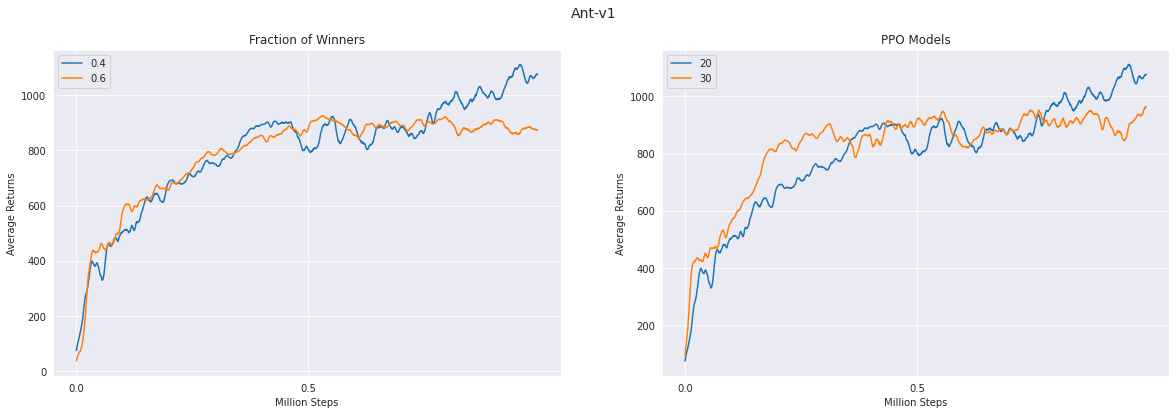

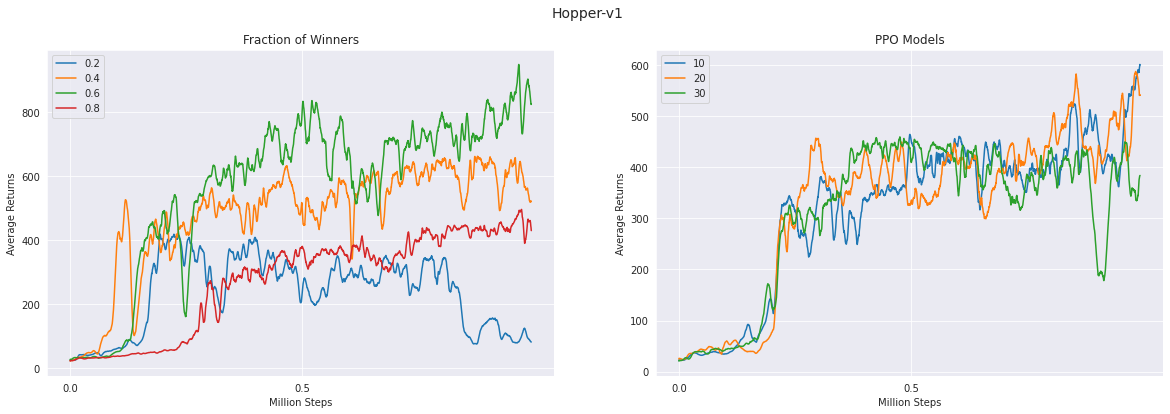

In [0]:
sns.set_style('dark', {'axes.grid' : True})
alpha = 0.5

####################### ANT-V1 ##############################
ppe_name = '/content/drive/My Drive/Colab Notebooks/PPE/Ant/'
winners = ['0.4','0.6']
ppo_models = ['20','30']

plt.figure(figsize=(20,6))
plt.suptitle('Ant-v1',fontsize=14)

## WINNER-TAKE-ALL
plt.subplot(121)
plt.title('Fraction of Winners')
for w in winners:
  data = moving_average(pkl.load(open(ppe_name+'E-'+w+'/data.pkl','rb'))['avg_reward'],20)
  plt.plot(data)
x = len(data)
plt.legend(winners)
plt.ylabel('Average Returns')
plt.xticks(np.arange(0,x,1500),np.arange(0,(x/3000),0.5))
plt.xlabel('Million Steps')


## PPO MODELS
plt.subplot(122)
plt.title('PPO Models')
for w in ppo_models:
  data = moving_average(pkl.load(open(ppe_name+'PPO-'+w+'/data.pkl','rb'))['avg_reward'],20)
  plt.plot(data)
x = len(data)
plt.legend(ppo_models)
plt.ylabel('Average Returns')
plt.xticks(np.arange(0,x,1500),np.arange(0,(x/3000),0.5))
plt.xlabel('Million Steps')


####################### HOPPER-V1 ##############################
ppe_name = '/content/drive/My Drive/Colab Notebooks/PPE/Hopper/'
winners = ['0.2','0.4','0.6','0.8']
ppo_models = ['10','20','30']

plt.figure(figsize=(20,6))
plt.suptitle('Hopper-v1',fontsize=14)

## WINNER-TAKE-ALL
plt.subplot(121)
plt.title('Fraction of Winners')
for w in winners:
  data = moving_average(pkl.load(open(ppe_name+'E-'+w+'/data.pkl','rb'))['avg_reward'],20)
  plt.plot(data)
x = len(data)
plt.legend(winners)
plt.ylabel('Average Returns')
plt.xticks(np.arange(0,x,1500),np.arange(0,(x/3000),0.5))
plt.xlabel('Million Steps')

## PPO MODELS
plt.subplot(122)
plt.title('PPO Models')
for w in ppo_models:
  data = moving_average(pkl.load(open(ppe_name+'PPO-'+w+'/data.pkl','rb'))['avg_reward'],20)
  plt.plot(data)
x = len(data)
plt.legend(ppo_models)
plt.ylabel('Average Returns')
plt.xticks(np.arange(0,x,1500),np.arange(0,(x/3000),0.5))
plt.xlabel('Million Steps')

